# Regressor de fluxo

A principal ideia deste regressor é:

* Encontrar os fluxos baseados nas features como populacao, distancia da ligacao, REGIC.

* Verificar quais features possuem mais influência no regressor

* Testar diferentes modelos

In [1]:
import pandas as pd

In [2]:
#Dados arranjos/mun
df_cidades = pd.read_csv("../data/integrado/arr_mun.csv")

#Dataframe com os rotulos
df_rodoviario = pd.read_csv("../data/calculado/arr_calculo_qtd_fluxo_no_pred.csv")

#Dataframe com as features
#Dados das ligacoes rodoviarias e hidroviaria IBGE 2016
df_li_trans = pd.read_csv('../data/fluxo_transporte/lig_rodo_hidro.csv', sep=",")
df_li_trans = pd.DataFrame(df_li_trans[['CODMUNDV_A', 'CODMUNDV_B','VAR03','VAR04','VAR06']])
df_li_trans.rename(columns={"ID": "id", "CODMUNDV_A": "cod_mun_a", "CODMUNDV_B": "cod_mun_b",'VAR03':"custo_min",'VAR04':"tempo_min", "VAR06": "freq_saida"}, inplace=True)

#Dados do REGIC 2018
#Integrado
df_regic = pd.read_csv('../data/integrado/cidades_regic.csv')
#Bruto
df_regic_lig = pd.read_excel(open('../data/regic/REGIC2018_Ligacoes_entre_Cidades.xlsx', 'rb'), sheet_name='REGIC2018_Ligacoes_entre_Cidade', 
                               dtype = {'cod_ori': int, 'cod_dest': int})
df_regic_lig.rename(columns={"cod_ori":"cod_origem", "cod_dest":"cod_destino"}, inplace=True)                            

In [3]:
df_li_trans_2 = df_li_trans.copy()
df_li_trans_2.rename(columns={"cod_mun_a":"cod_mun_b", "cod_mun_b":"cod_mun_a"}, inplace=True)

df_lig = pd.concat([df_li_trans_2,df_li_trans])
df_lig.rename(columns={"cod_mun_a":"cod_origem", "cod_mun_b":"cod_destino"}, inplace=True)

In [4]:
df_regic = df_regic.merge(df_cidades[['cod_cidade','populacao_2021']], 
                how='inner', 
                left_on=["cod_mun"], 
                right_on=["cod_cidade"])

In [5]:
df_regic_dest = pd.DataFrame(df_regic.add_suffix('_dest'))
df_regic_ori = pd.DataFrame(df_regic.add_suffix('_ori'))

df_regic_merge = df_lig.merge(df_regic_dest, 
                how='inner', 
                left_on=["cod_destino"], 
                right_on=["cod_mun_dest"])

df_regic_merge = df_regic_merge.merge(df_regic_ori, 
                how='inner', 
                left_on=["cod_origem"], 
                right_on=["cod_mun_ori"])


In [6]:
df_features_temp =  df_rodoviario.merge(df_regic_merge, 
                how='inner', 
                left_on=["cod_destino", "cod_origem"], 
                right_on=["cod_destino", "cod_origem"])

In [156]:
df_features_temp

,cod_origem,cod_destino,passageiros_rodov,passageiros_aereo,passageiros_total,prob_rodov,prob_aereo,prob_total,custo_min,tempo_min,...,ia_saude_a_ori,ia_ensino_sup_ori,ia_cultura_ori,ia_esporte_ori,ia_aeroporto_ori,ia_jornal_ori,ia_transporte_ori,num_leitos_ori,cod_cidade_ori,populacao_2021_ori
0,1100205,3131307,192.0,0.0,192.0,0.007283,0.000000,0.000487,512.00,2640,...,703520.266667,305411.296667,242445.350000,418772.066667,855048.316667,656108.950000,218109.491135,3.295974,1100205,577020.0
1,1100205,3136207,166.0,0.0,166.0,0.006297,0.000000,0.000421,670.16,3192,...,703520.266667,305411.296667,242445.350000,418772.066667,855048.316667,656108.950000,218109.491135,3.295974,1100205,577020.0
2,1100205,3205309,3.0,0.0,3.0,0.000114,0.000000,0.000008,680.91,3000,...,703520.266667,305411.296667,242445.350000,418772.066667,855048.316667,656108.950000,218109.491135,3.295974,1100205,577020.0
3,1100205,3509502,318.0,13856.0,14174.0,0.012063,0.037677,0.035963,428.04,2400,...,703520.266667,305411.296667,242445.350000,418772.066667,855048.316667,656108.950000,218109.491135,3.295974,1100205,577020.0
4,1100205,3541406,3.0,0.0,3.0,0.000114,0.000000,0.000008,447.01,2690,...,703520.266667,305411.296667,242445.350000,418772.066667,855048.316667,656108.950000,218109.491135,3.295974,1100205,577020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22328,5221601,4219507,1.0,0.0,1.0,0.000923,0.000000,0.000923,369.22,2040,...,1173.300000,46476.399708,51864.909886,46568.613333,0.000000,77536.042964,49625.822786,2.163264,5221601,41150.0
22329,5221601,4219705,1.0,0.0,1.0,0.000923,0.000000,0.000923,374.52,2070,...,1173.300000,46476.399708,51864.909886,46568.613333,0.000000,77536.042964,49625.822786,2.163264,5221601,41150.0
22330,5221601,5201108,15.0,0.0,15.0,0.013838,0.000000,0.013838,46.01,210,...,1173.300000,46476.399708,51864.909886,46568.613333,0.000000,77536.042964,49625.822786,2.163264,5221601,41150.0
22331,5221601,5208103,1.0,0.0,1.0,0.000923,0.000000,0.000923,21.55,120,...,1173.300000,46476.399708,51864.909886,46568.613333,0.000000,77536.042964,49625.822786,2.163264,5221601,41150.0


In [7]:
#calulando distancia entre ligacoes
df_cidades_dest = pd.DataFrame(df_cidades.add_suffix('_dest'))
df_cidades_ori = pd.DataFrame(df_cidades.add_suffix('_ori'))

df_features_temp =  df_features_temp.merge(df_cidades_ori[["cod_cidade_ori", "latitude_ori", "longitude_ori", "uf_ori"]], 
                how='inner', 
                left_on=["cod_origem"], 
                right_on=["cod_cidade_ori"])

df_features_temp =  df_features_temp.merge(df_cidades_dest[["cod_cidade_dest", "latitude_dest", "longitude_dest", "uf_dest"]], 
                how='inner', 
                left_on=["cod_destino"], 
                right_on=["cod_cidade_dest"])


In [8]:
from geopy import distance

df_features_temp["distancia"] = df_features_temp.apply(lambda row: distance.distance((row["latitude_ori"], row["longitude_ori"]), (row["latitude_dest"], row["longitude_dest"])).km, axis=1)

In [9]:
### Drop viagens dentro do mesmo estado
df_features_temp = df_features_temp[df_features_temp["uf_ori"] != df_features_temp["uf_dest"]]

In [10]:
df_label = df_features_temp[["passageiros_rodov"]]

df_features = df_features_temp[[
        'custo_min', 'tempo_min',
        'pib_dest', 'PIB_agro_dest', 'PIB_ind_dest',
        'PIB_serv_dest', 'PIB_pub_dest', 'hierarquia_dest',
        'CGT_dest', 'CI_dest', 'CGP_dest',
        'indice_atracao_dest', 'ia_vestuario_dest', 'ia_moveis_dest',
        'ia_saude_bm_dest', 'ia_saude_a_dest', 'ia_ensino_sup_dest',
        'ia_cultura_dest', 'ia_esporte_dest', 'ia_aeroporto_dest',
        'ia_jornal_dest', 'ia_transporte_dest', 'num_leitos_dest',
        'pib_ori', 'PIB_agro_ori', 'PIB_ind_ori', 'PIB_serv_ori',
        'PIB_pub_ori', 'hierarquia_ori', 'CGT_ori',
        'CI_ori', 'CGP_ori', 'indice_atracao_ori', 'ia_vestuario_ori',
        'ia_moveis_ori', 'ia_saude_bm_ori', 'ia_saude_a_ori',
        'ia_ensino_sup_ori', 'ia_cultura_ori', 'ia_esporte_ori',
        'ia_aeroporto_ori', 'ia_jornal_ori', 'ia_transporte_ori','num_leitos_ori',
        'populacao_2021_dest', 'populacao_2021_ori', 'distancia'
       ]]

In [11]:
df_label_2 = df_features_temp[["passageiros_rodov"]]

df_features_2 = df_features_temp[[
        'populacao_2021_dest', 'populacao_2021_ori', 'distancia'
       ]]

In [12]:
#Transformando variáveis categóricas em numéricas
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

hier = df_features["hierarquia_ori"].unique()
hier.sort()
le.fit(hier)
df_features["hierarquia_ori"] = le.transform(df_features["hierarquia_ori"])
df_features["hierarquia_dest"] = le.transform(df_features["hierarquia_dest"])


/var/folders/rv/x_8qm7392xv0jjj7dh82d9nm0000gn/T/ipykernel_49660/372019195.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features["hierarquia_ori"] = le.transform(df_features["hierarquia_ori"])
/var/folders/rv/x_8qm7392xv0jjj7dh82d9nm0000gn/T/ipykernel_49660/372019195.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features["hierarquia_dest"] = le.transform(df_features["hierarquia_dest"])


In [13]:
#Preenchendo dados faltantes
df_features = df_features.fillna(0)

In [14]:
df_features.shape

(19378, 47)

In [15]:
#Aplicando log para a varável target
from numpy import log10
import numpy as np
df_label["passageiros_rodov_log"] = log10(df_label["passageiros_rodov"])
df_label["passageiros_rodov_log"].replace([np. inf, -np. inf], 0, inplace=True)


/opt/miniconda3/envs/alerta_epidemia/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/rv/x_8qm7392xv0jjj7dh82d9nm0000gn/T/ipykernel_49660/4142859930.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label["passageiros_rodov_log"] = log10(df_label["passageiros_rodov"])
/var/folders/rv/x_8qm7392xv0jjj7dh82d9nm0000gn/T/ipykernel_49660/4142859930.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label["passageiros_rodov_log"].replac

In [16]:
df_label_2["passageiros_rodov_log"] = log10(df_label_2["passageiros_rodov"])
df_label_2["passageiros_rodov_log"].replace([np. inf, -np. inf], 0, inplace=True)

/opt/miniconda3/envs/alerta_epidemia/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/rv/x_8qm7392xv0jjj7dh82d9nm0000gn/T/ipykernel_49660/4169795638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label_2["passageiros_rodov_log"] = log10(df_label_2["passageiros_rodov"])
/var/folders/rv/x_8qm7392xv0jjj7dh82d9nm0000gn/T/ipykernel_49660/4169795638.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label_2["passageiros_rodov_log"].

In [17]:
#Tranformando dataset to array
X = df_features.to_numpy()
y = df_label["passageiros_rodov"].values.ravel()
y_log = df_label["passageiros_rodov_log"].values.ravel()

In [18]:
X_2 = df_features_2.to_numpy()
y_2 = df_label_2["passageiros_rodov"].values.ravel()
y_log_2 = df_label_2["passageiros_rodov_log"].values.ravel()

Visualizando os dados

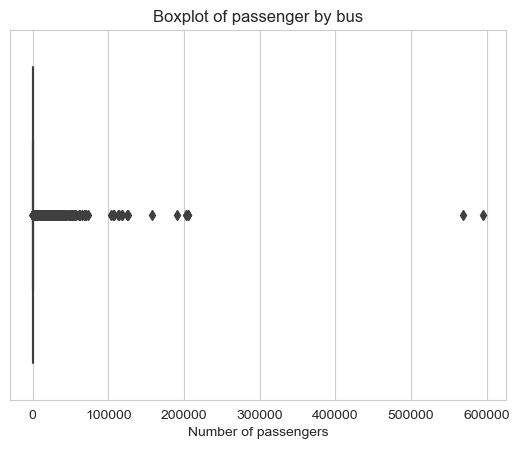

In [169]:
import seaborn as sns
sns.set_style("whitegrid")
plot1 = sns.boxplot(x=df_label["passageiros_rodov"]).set(title = 'Boxplot of passenger by bus', xlabel  = "Number of passengers")
# plot1.set(xlabel  = "Number of passengers", fontsize = 10)
# plot1.set_ylabel("Y-Axis", fontsize = 20)

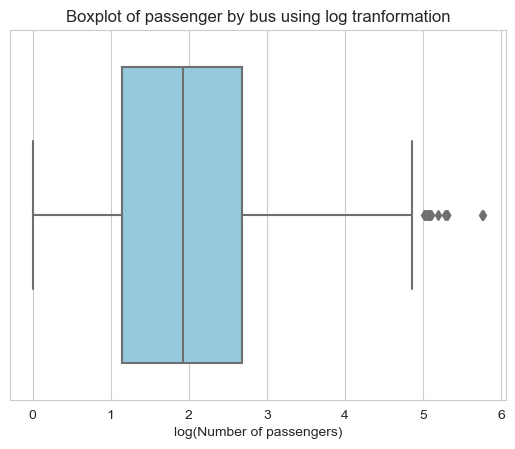

In [170]:
plot1 = sns.boxplot(x=df_label["passageiros_rodov_log"], color='skyblue').set(title = 'Boxplot of passenger by bus using log tranformation', xlabel  = "log(Number of passengers)")


## Classificadores


In [19]:
from time import time

from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

In [20]:
#Dividindo em treino e teste
# X_train, X_test, y_train, y_test = train_test_split(X_sc, y,random_state=10, test_size=0.3)
X_train, X_test, y_train, y_test = train_test_split(X, y_log,random_state=10, test_size=0.25)

In [21]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_log_2,random_state=10, test_size=0.25)

In [22]:
#Perform Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [23]:
sc_2 = StandardScaler()
sc_2.fit(X_train_2)
X_train_2 = sc_2.transform(X_train_2)
X_test_2 = sc_2.transform(X_test_2)

In [177]:
X_train.shape

(14533, 47)

In [47]:
regressors = [
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge(),
    SVR()
]

In [48]:
head = 10
for model in regressors:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()

KNeighborsRegressor()
	Training time: 0.015s
	Prediction time: 0.054s
	Explained variance: 0.3103596602145623
	Mean absolute error: 0.6922738785294305
	R2 score: 0.310351483268249

GradientBoostingRegressor()
	Training time: 2.247s
	Prediction time: 0.008s
	Explained variance: 0.4521829459189335
	Mean absolute error: 0.6105079566954121
	R2 score: 0.4519015013232017

ExtraTreesRegressor()
	Training time: 2.472s
	Prediction time: 0.165s
	Explained variance: 0.4045851423147927
	Mean absolute error: 0.6222544075602099
	R2 score: 0.4044017517801701

RandomForestRegressor()
	Training time: 5.175s
	Prediction time: 0.202s
	Explained variance: 0.43717284429057757
	Mean absolute error: 0.6053974607226815
	R2 score: 0.4368578030879531

DecisionTreeRegressor()
	Training time: 0.074s
	Prediction time: 0.002s
	Explained variance: 0.03477408227010015
	Mean absolute error: 0.7852168350250794
	R2 score: 0.03461088213104735

LinearRegression()
	Training time: 0.011s
	Prediction time: 0.000s
	Explained 

In [349]:
res = pd.DataFrame()
res["real"] = y_test
res["pred"] = y_test_pred
res.head(50)

,real,pred
0,300.0,112.599275
1,9.0,-123.329444
2,1.0,10.521427
3,256.0,322.395432
4,1001.0,3369.507256
5,495.0,3423.430312
6,1267.0,3065.106508
7,15.0,29.774289
8,60.0,-88.485385
9,20.0,-12415.521121


### RandomForest Regressor

In [82]:
model = RandomForestRegressor(
    min_samples_split=50,
    min_samples_leaf=10,
    max_depth=7,
    max_features=20,
    random_state=10)


param_test1 = {'n_estimators':range(600,1000,20)}
# param_test1 = {'n_estimators':range(100,1501,100)}
gsearch1RF = GridSearchCV(estimator = model, param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=-1, cv=5,verbose=3)
gsearch1RF.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .................n_estimators=600;, score=-0.584 total time=  14.1s
[CV 2/5] END .................n_estimators=600;, score=-0.558 total time=  14.1s
[CV 4/5] END .................n_estimators=600;, score=-0.583 total time=  14.0s
[CV 3/5] END .................n_estimators=600;, score=-0.591 total time=  14.0s
[CV 5/5] END .................n_estimators=600;, score=-0.587 total time=  14.0s
[CV 2/5] END .................n_estimators=620;, score=-0.558 total time=  14.4s
[CV 1/5] END .................n_estimators=620;, score=-0.584 total time=  14.5s
[CV 3/5] END .................n_estimators=620;, score=-0.591 total time=  14.6s
[CV 4/5] END .................n_estimators=620;, score=-0.583 total time=  15.0s
[CV 5/5] END .................n_estimators=620;, score=-0.587 total time=  14.9s
[CV 1/5] END .................n_estimators=640;, score=-0.584 total time=  15.3s
[CV 2/5] END .................n_estimators=640;

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=7, max_features=20,
                                             min_samples_leaf=10,
                                             min_samples_split=50,
                                             random_state=10),
             n_jobs=-1, param_grid={'n_estimators': range(600, 1000, 20)},
             scoring='neg_mean_squared_error', verbose=3)

In [83]:
resultsRF = pd.DataFrame(gsearch1RF.cv_results_)
resultsRFSorted = resultsRF.sort_values(by='rank_test_score')
resultsRFSorted.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
10,20.575534,1.909812,0.457752,0.090949,800,{'n_estimators': 800},-0.583707,-0.557642,-0.590598,-0.582459,-0.587204,-0.580322,0.011690,1
11,19.527238,0.079358,0.384755,0.025129,820,{'n_estimators': 820},-0.583800,-0.557603,-0.590605,-0.582489,-0.587196,-0.580339,0.011713,2
9,20.536890,1.803531,0.397523,0.071004,780,{'n_estimators': 780},-0.583685,-0.557716,-0.590621,-0.582456,-0.587293,-0.580354,0.011675,3
12,20.518295,0.236361,0.401468,0.042014,840,{'n_estimators': 840},-0.583837,-0.557644,-0.590654,-0.582489,-0.587187,-0.580362,0.011706,4
13,20.316135,0.205256,0.398185,0.032013,860,{'n_estimators': 860},-0.583863,-0.557615,-0.590697,-0.582512,-0.587126,-0.580363,0.011721,5


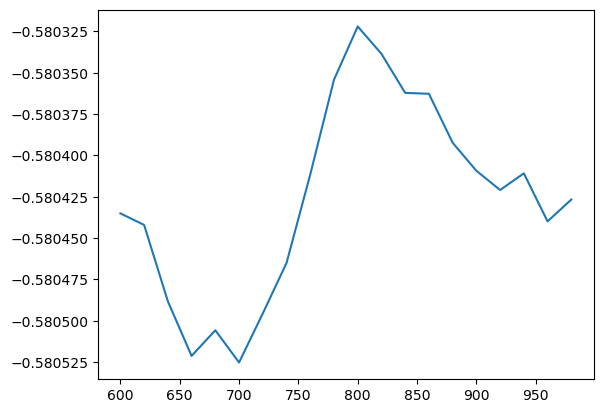

In [84]:
plt.plot(resultsRF['param_n_estimators'],resultsRF['mean_test_score'], linestyle='solid')

In [97]:
param_test2 = {
    'max_depth':range(3,21,2), 
    'min_samples_split':range(10,111,20)
    }
model = RandomForestRegressor(
    n_estimators = 800,
    min_samples_leaf=10,
    max_features=20,
    random_state=10)

gsearch2RF = GridSearchCV(estimator = model, param_grid = param_test2, scoring='neg_mean_squared_error',n_jobs=-1, cv=5,verbose=3)
gsearch2RF.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END max_depth=3, min_samples_split=10;, score=-0.740 total time=  12.9s
[CV 2/5] END max_depth=3, min_samples_split=10;, score=-0.724 total time=  13.3s
[CV 4/5] END max_depth=3, min_samples_split=10;, score=-0.734 total time=  13.4s
[CV 3/5] END max_depth=3, min_samples_split=10;, score=-0.772 total time=  13.5s
[CV 5/5] END max_depth=3, min_samples_split=10;, score=-0.777 total time=  29.4s
[CV 1/5] END max_depth=3, min_samples_split=30;, score=-0.740 total time=  29.5s
[CV 2/5] END max_depth=3, min_samples_split=30;, score=-0.724 total time=  29.7s
[CV 3/5] END max_depth=3, min_samples_split=30;, score=-0.772 total time=  29.6s
[CV 4/5] END max_depth=3, min_samples_split=30;, score=-0.734 total time=  12.7s
[CV 1/5] END max_depth=3, min_samples_split=50;, score=-0.740 total time=  12.1s
[CV 2/5] END max_depth=3, min_samples_split=50;, score=-0.724 total time=  12.1s
[CV 5/5] END max_depth=3, min_samples_split=30;

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_features=20,
                                             min_samples_leaf=10,
                                             n_estimators=800,
                                             random_state=10),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 21, 2),
                         'min_samples_split': range(10, 111, 20)},
             scoring='neg_mean_squared_error', verbose=3)

In [99]:
resultsRF = pd.DataFrame(gsearch2RF.cv_results_)
resultsRFSorted = resultsRF.sort_values(by='rank_test_score')
resultsRFSorted.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
31,23.578131,0.135836,0.468720,0.055268,13,30,"{'max_depth': 13, 'min_samples_split': 30}",-0.565020,-0.544149,-0.576850,-0.566772,-0.567807,-0.564120,0.010792,1
37,24.247689,0.326549,0.515587,0.063582,15,30,"{'max_depth': 15, 'min_samples_split': 30}",-0.565173,-0.544139,-0.577018,-0.566652,-0.567763,-0.564149,0.010829,2
49,23.668417,0.289690,0.537322,0.142182,19,30,"{'max_depth': 19, 'min_samples_split': 30}",-0.565248,-0.544141,-0.577125,-0.566562,-0.567679,-0.564151,0.010846,3
43,23.613560,0.371935,0.453517,0.004405,17,30,"{'max_depth': 17, 'min_samples_split': 30}",-0.565236,-0.544154,-0.577108,-0.566583,-0.567691,-0.564155,0.010839,4
24,21.714677,0.223023,0.392849,0.007435,11,10,"{'max_depth': 11, 'min_samples_split': 10}",-0.564480,-0.544176,-0.576746,-0.567368,-0.568370,-0.564228,0.010825,5


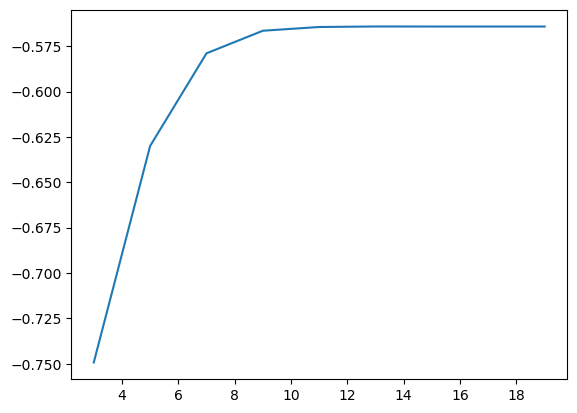

In [100]:
resultsRFPlot = resultsRF[resultsRF["param_min_samples_split"]==30]
plt.plot(resultsRFPlot['param_max_depth'],resultsRFPlot['mean_test_score'], linestyle='solid')

In [101]:
param_test3 = {
    'min_samples_leaf':range(1,21,2), 
    }
model = RandomForestRegressor(
    n_estimators = 800,
    max_depth = 11,
    min_samples_split = 30,
    max_features=20,
    random_state=10
    )

gsearch3RF = GridSearchCV(estimator = model, param_grid = param_test3, scoring='neg_mean_squared_error',n_jobs=-1, cv=5,verbose=3)
gsearch3RF.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ...............min_samples_leaf=1;, score=-0.561 total time=  30.1s
[CV 3/5] END ...............min_samples_leaf=1;, score=-0.572 total time=  30.2s
[CV 2/5] END ...............min_samples_leaf=1;, score=-0.544 total time=  30.2s
[CV 4/5] END ...............min_samples_leaf=1;, score=-0.563 total time=  30.2s
[CV 2/5] END ...............min_samples_leaf=3;, score=-0.544 total time=  23.5s
[CV 1/5] END ...............min_samples_leaf=3;, score=-0.562 total time=  23.6s
[CV 3/5] END ...............min_samples_leaf=3;, score=-0.573 total time=  23.8s
[CV 5/5] END ...............min_samples_leaf=1;, score=-0.563 total time=  24.0s
[CV 4/5] END ...............min_samples_leaf=3;, score=-0.562 total time=  24.3s
[CV 5/5] END ...............min_samples_leaf=3;, score=-0.565 total time=  24.3s
[CV 1/5] END ...............min_samples_leaf=5;, score=-0.562 total time=  24.0s
[CV 2/5] END ...............min_samples_leaf=5;,

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=11, max_features=20,
                                             min_samples_split=30,
                                             n_estimators=800,
                                             random_state=10),
             n_jobs=-1, param_grid={'min_samples_leaf': range(1, 21, 2)},
             scoring='neg_mean_squared_error', verbose=3)

In [103]:
resultsRF = pd.DataFrame(gsearch3RF.cv_results_)
resultsRFSorted = resultsRF.sort_values(by='rank_test_score')
resultsRFSorted.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,28.394393,2.516232,0.548604,0.038792,1,{'min_samples_leaf': 1},-0.561223,-0.543915,-0.571953,-0.562532,-0.563363,-0.560597,0.009155,1
1,23.398933,0.371573,0.494590,0.031794,3,{'min_samples_leaf': 3},-0.561538,-0.543722,-0.572998,-0.562026,-0.564799,-0.561017,0.009573,2
2,26.827745,2.632652,0.757927,0.246104,5,{'min_samples_leaf': 5},-0.562364,-0.544112,-0.574171,-0.562742,-0.566256,-0.561929,0.009868,3
3,28.282768,0.260732,0.509137,0.071342,7,{'min_samples_leaf': 7},-0.563344,-0.544460,-0.575283,-0.564696,-0.566776,-0.562912,0.010117,4
4,41.920804,7.559809,1.290231,0.258078,9,{'min_samples_leaf': 9},-0.564548,-0.544309,-0.576391,-0.566458,-0.567502,-0.563842,0.010581,5


In [ ]:
plt.plot(resultsRFPlot['param_min_samples_split'],resultsRFPlot['mean_test_score'], linestyle='solid')

In [104]:
param_test4 = {
    'max_features':range(2,45,2), 
    }
model = RandomForestRegressor(
    n_estimators = 800,
    max_depth = 11,
    min_samples_split = 30,
    min_samples_leaf= 1,
    random_state=10
    )

gsearch4RF = GridSearchCV(estimator = model, param_grid = param_test4, scoring='neg_mean_squared_error',n_jobs=-1, cv=5,verbose=3)
gsearch4RF.fit(X_train, y_train)

Fitting 5 folds for each of 22 candidates, totalling 110 fits
[CV 3/5] END ...................max_features=2;, score=-0.570 total time=  24.5s
[CV 4/5] END ...................max_features=2;, score=-0.561 total time=  24.5s
[CV 2/5] END ...................max_features=2;, score=-0.541 total time=  24.6s
[CV 1/5] END ...................max_features=2;, score=-0.560 total time=  25.0s
[CV 5/5] END ...................max_features=2;, score=-0.562 total time=  24.6s
[CV 1/5] END ...................max_features=4;, score=-0.561 total time=  32.0s
[CV 3/5] END ...................max_features=4;, score=-0.572 total time=  31.8s
[CV 2/5] END ...................max_features=4;, score=-0.544 total time=  32.2s
[CV 4/5] END ...................max_features=4;, score=-0.563 total time=  27.7s
[CV 2/5] END ...................max_features=6;, score=-0.544 total time=  28.1s
[CV 1/5] END ...................max_features=6;, score=-0.561 total time=  28.1s
[CV 5/5] END ...................max_features=4;

KeyboardInterrupt: 

In [96]:
resultsRF = pd.DataFrame(gsearch4RF.cv_results_)
resultsRFSorted = resultsRF.sort_values(by='rank_test_score')
resultsRFSorted

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
10,2.677796,0.092685,0.052192,0.007815,22,{'max_features': 22},-0.584585,-0.558702,-0.590410,-0.584528,-0.588834,-0.581412,0.011590,1
19,4.800901,0.932303,0.120861,0.033134,40,{'max_features': 40},-0.584585,-0.558702,-0.590410,-0.584528,-0.588834,-0.581412,0.011590,1
18,2.671318,0.026161,0.055724,0.009513,38,{'max_features': 38},-0.584585,-0.558702,-0.590410,-0.584528,-0.588834,-0.581412,0.011590,1
17,2.756453,0.041617,0.060491,0.018752,36,{'max_features': 36},-0.584585,-0.558702,-0.590410,-0.584528,-0.588834,-0.581412,0.011590,1
16,2.623027,0.093840,0.046435,0.002865,34,{'max_features': 34},-0.584585,-0.558702,-0.590410,-0.584528,-0.588834,-0.581412,0.011590,1
15,3.115069,0.066323,0.062168,0.026478,32,{'max_features': 32},-0.584585,-0.558702,-0.590410,-0.584528,-0.588834,-0.581412,0.011590,1
14,2.882799,0.310750,0.061591,0.014078,30,{'max_features': 30},-0.584585,-0.558702,-0.590410,-0.584528,-0.588834,-0.581412,0.011590,1
13,2.493961,0.082335,0.053553,0.008897,28,{'max_features': 28},-0.584585,-0.558702,-0.590410,-0.584528,-0.588834,-0.581412,0.011590,1
12,2.474062,0.057079,0.053615,0.011022,26,{'max_features': 26},-0.584585,-0.558702,-0.590410,-0.584528,-0.588834,-0.581412,0.011590,1
11,2.533008,0.068577,0.052447,0.014079,24,{'max_features': 24},-0.584585,-0.558702,-0.590410,-0.584528,-0.588834,-0.581412,0.011590,1


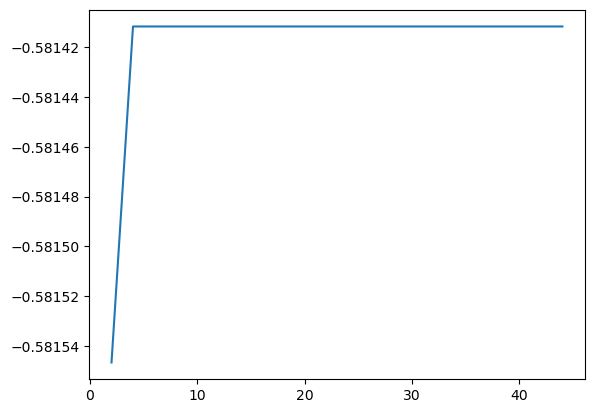

In [95]:
plt.plot(resultsRF['param_max_features'],resultsRF['mean_test_score'], linestyle='solid')

In [362]:
best = {'n_estimators': 210, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 32, 'criterion': 'poisson', 'bootstrap': False}
rf = RandomForestRegressor(**best)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)

0.5977725194359124

Retirando features sem importancia

Text(0.5, 0, 'Random Forest Feature Importance')

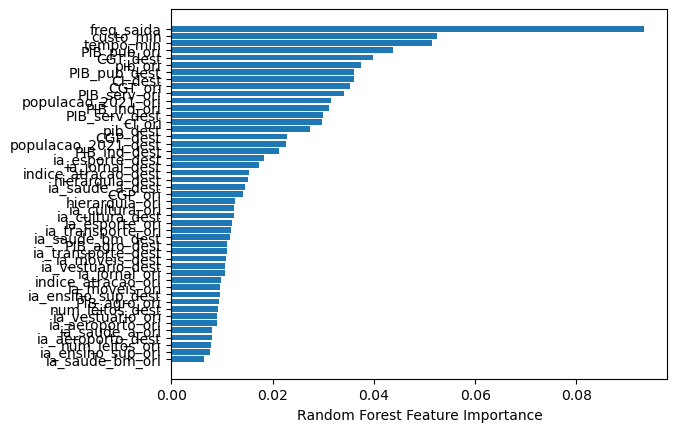

In [137]:
from matplotlib import pyplot as plt
sorted_idx = rf.feature_importances_.argsort()
plt.barh(df_features.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [202]:
res = rf.predict(X_test)
df_res = pd.DataFrame()
df_res['prediction'] = res
df_res['label'] = y_test
rf.feature_importances_

array([0.05238414, 0.05149648, 0.09333111, 0.02727832, 0.01105555,
       0.02125076, 0.02988416, 0.0361176 , 0.01510246, 0.03975548,
       0.03605677, 0.02289349, 0.01540947, 0.0106163 , 0.01067569,
       0.01147067, 0.01452442, 0.00950544, 0.01230626, 0.01826577,
       0.00800027, 0.01733598, 0.01087359, 0.00921597, 0.03745713,
       0.00943552, 0.03107475, 0.03403569, 0.04380364, 0.01253211,
       0.03525559, 0.02971719, 0.01407227, 0.00968762, 0.00904758,
       0.00950864, 0.00633314, 0.00801522, 0.00760812, 0.01233993,
       0.01188999, 0.00901907, 0.0105902 , 0.01167534, 0.00789331,
       0.02263585, 0.03156596])

In [203]:
res = pd.DataFrame()
res["real"] = y_test
res["pred"] = y_pred
res.head(50)

,real,pred
0,60.0,54.777382
1,11.0,-94.066583
2,33.0,20.102441
3,129.0,142.406818
4,459.0,532.728154
5,5.0,-134.254676
6,523.0,337.738697
7,75.0,-106.813562
8,62.0,66.523934
9,671.0,62.881334


Text(0.5, 0, 'Random Forest Feature Importance')

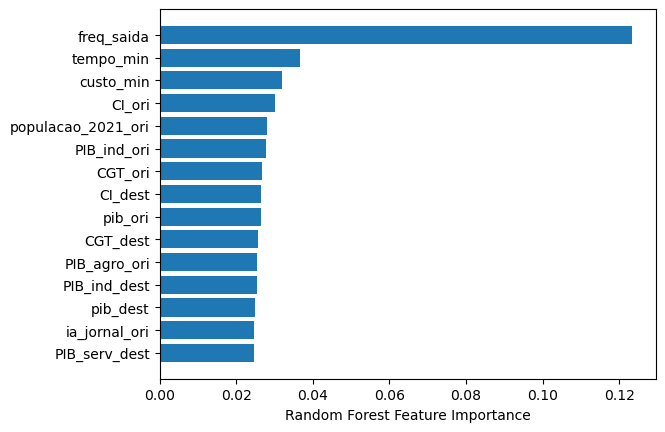

In [457]:
from matplotlib import pyplot as plt
sorted_idx = rf.feature_importances_.argsort()
plt.barh(df_features.columns[sorted_idx][-15:], rf.feature_importances_[sorted_idx][-15:])
plt.xlabel("Random Forest Feature Importance")

### XGBoost

In [26]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [297]:
xgb1 = xgb.XGBRegressor(seed = 123)
 
# Fitting the model
xgb1.fit(X_train, y_train)
pred_train = xgb1.predict(X_train)
 
# Predict the model
pred = xgb1.predict(X_test)

#Caculating score
print(r2_score(y_train, pred_train))
print(r2_score(y_test, pred))



0.8464813640819904
0.5764241064079687


In [31]:
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='neg_mean_squared_error',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=3,
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred, gs

In [32]:
#Step 1 - Estimators e Learning Rate
model = xgb.XGBRegressor(max_depth = 5, 
                        min_child_weight = 1, 
                        gamma = 0, 
                        subsample=0.8,
                        colsample_bytree=0.8, 
                        scale_pos_weight = 1, 
                        seed=42)
param_grid = {
    'n_estimators': range(500, 1000, 100),
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

model, pred, gs1 = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=5)

# Root Mean Squared Error
print(model.best_score_)
print(model.best_params_)
print("score_test: ",r2_score(y_test, pred))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 2/5] END learning_rate=0.01, n_estimators=500;, score=-0.508 total time=  34.9s
[CV 1/5] END learning_rate=0.01, n_estimators=500;, score=-0.503 total time=  35.1s
[CV 3/5] END learning_rate=0.01, n_estimators=500;, score=-0.512 total time=  35.1s
[CV 4/5] END learning_rate=0.01, n_estimators=500;, score=-0.502 total time=  35.1s
[CV 5/5] END learning_rate=0.01, n_estimators=500;, score=-0.491 total time=  30.2s
[CV 1/5] END learning_rate=0.01, n_estimators=600;, score=-0.495 total time=  36.2s
[CV 3/5] END learning_rate=0.01, n_estimators=600;, score=-0.505 total time=  36.6s
[CV 2/5] END learning_rate=0.01, n_estimators=600;, score=-0.500 total time=  36.8s
[CV 4/5] END learning_rate=0.01, n_estimators=600;, score=-0.494 total time=  36.6s
[CV 5/5] END learning_rate=0.01, n_estimators=600;, score=-0.482 total time=  36.5s
[CV 2/5] END learning_rate=0.01, n_estimators=700;, score=-0.493 total time=  42.0s
[CV 1/5] END l

In [ ]:
resultsRF = pd.DataFrame(gs1.cv_results_)
resultsRFSorted = resultsRF.sort_values(by='rank_test_score')
resultsRFSorted.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
29,64.492658,1.404394,0.147630,0.017362,0.1,950,"{'learning_rate': 0.1, 'n_estimators': 950}",-0.432460,-0.418216,-0.435921,-0.430201,-0.437187,-0.430797,0.006760,1
28,56.804960,0.085631,0.121518,0.000790,0.1,850,"{'learning_rate': 0.1, 'n_estimators': 850}",-0.433305,-0.419344,-0.436033,-0.431117,-0.438214,-0.431603,0.006584,2
19,64.908142,1.299169,0.144582,0.019021,0.05,950,"{'learning_rate': 0.05, 'n_estimators': 950}",-0.428052,-0.426912,-0.441080,-0.432670,-0.431128,-0.431968,0.005003,3
27,50.195520,0.318875,0.110258,0.001255,0.1,750,"{'learning_rate': 0.1, 'n_estimators': 750}",-0.434321,-0.420590,-0.435678,-0.432867,-0.438224,-0.432336,0.006132,4
26,43.807441,0.079913,0.101498,0.003606,0.1,650,"{'learning_rate': 0.1, 'n_estimators': 650}",-0.437669,-0.422397,-0.434628,-0.434002,-0.440209,-0.433781,0.006112,5


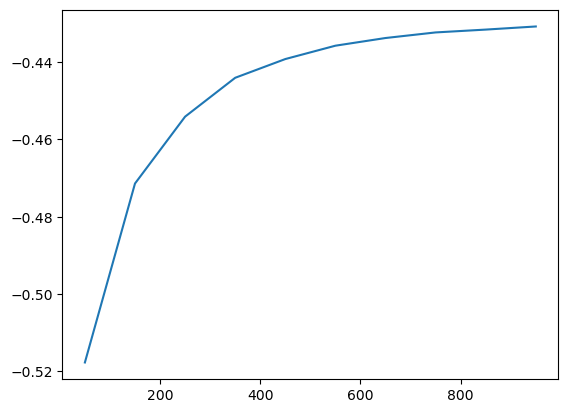

In [ ]:
resultsRF11 = resultsRF[resultsRF.param_learning_rate == 0.1]
# resultsRF5 = resultsRF[resultsRF.param_max_depth == 0.05]
# resultsRF7 = resultsRF[resultsRF.param_max_depth == 7]

plt.plot(resultsRF11['param_n_estimators'],resultsRF11['mean_test_score'], linestyle='solid')
# plt.plot(resultsRF5['param_min_samples_split'],resultsRF5['mean_test_score'], linestyle='solid')
# plt.plot(resultsRF['param_max_depth'],resultsRF['mean_test_score'], linestyle='solid')

In [27]:
#Step 2 - 
model = xgb.XGBRegressor(n_estimators = 1000,
                        learning_rate = 0.1,
                        gamma = 0, 
                        subsample=0.8,
                        colsample_bytree=0.8, 
                        scale_pos_weight = 1, 
                        seed=42)
param_grid = {
    'max_depth': range(3, 10, 2),
    'min_child_weight': range(1, 6, 2)
    # 'max_depth': [3,4,5],
    # 'min_child_weight': [1,2]
}

model, pred, gs1 = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=5)

# Root Mean Squared Error
print(model.best_score_)
print(model.best_params_)
print("score_test: ",r2_score(y_test, pred))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 3/5] END ..max_depth=3, min_child_weight=1;, score=-0.453 total time=  45.2s
[CV 2/5] END ..max_depth=3, min_child_weight=1;, score=-0.440 total time=  45.3s
[CV 1/5] END ..max_depth=3, min_child_weight=1;, score=-0.452 total time=  45.3s
[CV 4/5] END ..max_depth=3, min_child_weight=1;, score=-0.444 total time=  45.6s
[CV 1/5] END ..max_depth=3, min_child_weight=3;, score=-0.452 total time=  40.4s
[CV 5/5] END ..max_depth=3, min_child_weight=1;, score=-0.452 total time=  40.4s
[CV 2/5] END ..max_depth=3, min_child_weight=3;, score=-0.436 total time=  40.5s
[CV 3/5] END ..max_depth=3, min_child_weight=3;, score=-0.454 total time=  40.5s
[CV 4/5] END ..max_depth=3, min_child_weight=3;, score=-0.447 total time=  40.3s
[CV 5/5] END ..max_depth=3, min_child_weight=3;, score=-0.448 total time=  40.5s
[CV 1/5] END ..max_depth=3, min_child_weight=5;, score=-0.451 total time=  40.5s
[CV 2/5] END ..max_depth=3, min_child_weight=5;,

In [28]:
resultsRF = pd.DataFrame(gs1.cv_results_)
resultsRFSorted = resultsRF.sort_values(by='rank_test_score')
resultsRFSorted.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_child_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,67.721006,0.588926,0.157859,0.023809,5,1,"{'max_depth': 5, 'min_child_weight': 1}",-0.432086,-0.417399,-0.435888,-0.430617,-0.435534,-0.430305,0.006758,1
5,82.884704,5.577332,0.273300,0.130807,5,5,"{'max_depth': 5, 'min_child_weight': 5}",-0.427590,-0.421183,-0.439364,-0.426987,-0.439675,-0.430960,0.007339,2
4,68.203318,4.015699,0.151923,0.025129,5,3,"{'max_depth': 5, 'min_child_weight': 3}",-0.430641,-0.425167,-0.444721,-0.434376,-0.435038,-0.433989,0.006410,3
7,102.913416,1.891443,0.260991,0.049753,7,3,"{'max_depth': 7, 'min_child_weight': 3}",-0.426709,-0.426334,-0.451090,-0.438174,-0.439082,-0.436278,0.009180,4
6,121.299112,4.973063,0.296582,0.064874,7,1,"{'max_depth': 7, 'min_child_weight': 1}",-0.437757,-0.428425,-0.443221,-0.437335,-0.448560,-0.439060,0.006713,5


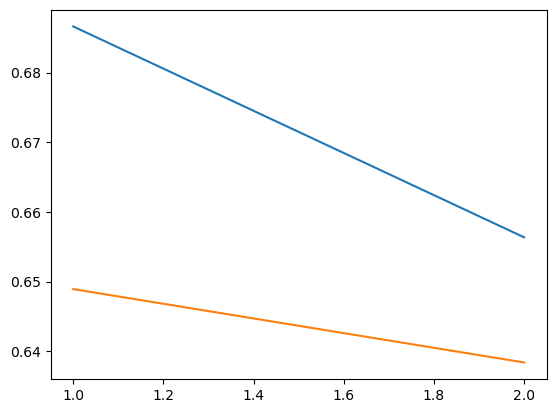

In [268]:
resultsRF5 = resultsRF[resultsRF.param_max_depth == 3]
resultsRF7 = resultsRF[resultsRF.param_max_depth == 4]
# resultsRF7 = resultsRF[resultsRF.param_max_depth == 7]

plt.plot(resultsRF5['param_min_child_weight'],resultsRF5['mean_test_score'], linestyle='solid')
plt.plot(resultsRF7['param_min_child_weight'],resultsRF7['mean_test_score'], linestyle='solid')


In [29]:
#Step 3 - Gamma
model = xgb.XGBRegressor(n_estimators = 1000,
                        learning_rate = 0.1,
                        max_depth = 5,
                        min_child_weight = 1, 
                        subsample=0.8,
                        colsample_bytree=0.8, 
                        scale_pos_weight = 1,
                        seed=42)
param_grid = {
    'gamma':[i/10.0 for i in range(0,5)]
}

model, pred, gs1 = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=5)

# Root Mean Squared Error
print(model.best_score_)
print(model.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 4/5] END ........................gamma=0.0;, score=-0.431 total time= 1.1min
[CV 2/5] END ........................gamma=0.0;, score=-0.417 total time= 1.2min
[CV 1/5] END ........................gamma=0.0;, score=-0.432 total time= 1.2min
[CV 3/5] END ........................gamma=0.0;, score=-0.436 total time= 1.2min
[CV 5/5] END ........................gamma=0.0;, score=-0.436 total time= 1.4min
[CV 1/5] END ........................gamma=0.1;, score=-0.430 total time= 1.4min
[CV 2/5] END ........................gamma=0.1;, score=-0.418 total time= 1.4min
[CV 3/5] END ........................gamma=0.1;, score=-0.439 total time= 1.4min
[CV 5/5] END ........................gamma=0.1;, score=-0.437 total time= 1.1min
[CV 4/5] END ........................gamma=0.1;, score=-0.426 total time= 1.1min
[CV 1/5] END ........................gamma=0.2;, score=-0.432 total time= 1.1min
[CV 2/5] END ........................gamma=0.2;, 

In [30]:
resultsRF = pd.DataFrame(gs1.cv_results_)
resultsRFSorted = resultsRF.sort_values(by='rank_test_score')
resultsRFSorted.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,76.679319,9.224418,0.152848,0.018652,0.1,{'gamma': 0.1},-0.429861,-0.417923,-0.439130,-0.425573,-0.437061,-0.429910,0.007728,1
0,72.138641,6.179407,0.163350,0.024926,0.0,{'gamma': 0.0},-0.432086,-0.417399,-0.435888,-0.430617,-0.435534,-0.430305,0.006758,2
2,65.243900,0.143973,0.188624,0.026806,0.2,{'gamma': 0.2},-0.431695,-0.419680,-0.440074,-0.430833,-0.439132,-0.432283,0.007333,3
3,83.709220,9.426889,0.172057,0.036725,0.3,{'gamma': 0.3},-0.426239,-0.424766,-0.442122,-0.429292,-0.442158,-0.432915,0.007672,4
4,72.082399,18.329053,0.132146,0.029749,0.4,{'gamma': 0.4},-0.431066,-0.421823,-0.443821,-0.430542,-0.439260,-0.433302,0.007623,5


In [31]:
#Step 4 - 
model = xgb.XGBRegressor(n_estimators = 1000,
                        learning_rate = 0.1,
                        max_depth = 5,
                        min_child_weight = 1,
                        gamma = 0.1, 
                        scale_pos_weight = 1,
                        seed=42)
param_grid = {
    'subsample':[i/10.0 for i in range(6,11)],
    'colsample_bytree':[i/10.0 for i in range(6,11)]
    # 'subsample':[i/100.0 for i in range(65,80,5)],
    # 'colsample_bytree':[i/100.0 for i in range(85,100,5)]
}

model, pred, gs1 = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=5)

# Root Mean Squared Error
print(model.best_score_)
print(model.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 3/5] END colsample_bytree=0.6, subsample=0.6;, score=-0.454 total time=  56.4s
[CV 2/5] END colsample_bytree=0.6, subsample=0.6;, score=-0.428 total time=  56.6s
[CV 4/5] END colsample_bytree=0.6, subsample=0.6;, score=-0.437 total time=  56.6s
[CV 1/5] END colsample_bytree=0.6, subsample=0.6;, score=-0.442 total time=  57.0s
[CV 5/5] END colsample_bytree=0.6, subsample=0.6;, score=-0.446 total time=  48.8s
[CV 1/5] END colsample_bytree=0.6, subsample=0.7;, score=-0.434 total time=  49.6s
[CV 2/5] END colsample_bytree=0.6, subsample=0.7;, score=-0.432 total time=  49.7s
[CV 3/5] END colsample_bytree=0.6, subsample=0.7;, score=-0.444 total time=  50.0s
[CV 4/5] END colsample_bytree=0.6, subsample=0.7;, score=-0.440 total time=  49.7s
[CV 5/5] END colsample_bytree=0.6, subsample=0.7;, score=-0.446 total time=  49.9s
[CV 1/5] END colsample_bytree=0.6, subsample=0.8;, score=-0.433 total time=  50.3s
[CV 2/5] END colsample_by

In [32]:
resultsRF = pd.DataFrame(gs1.cv_results_)
resultsRFSorted = resultsRF.sort_values(by='rank_test_score')
resultsRFSorted.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
18,78.124254,0.393255,0.141730,0.004436,0.9,0.9,"{'colsample_bytree': 0.9, 'subsample': 0.9}",-0.424855,-0.415526,-0.435583,-0.429156,-0.435182,-0.428060,0.007428,1
14,69.819990,1.416826,0.167462,0.048587,0.8,1.0,"{'colsample_bytree': 0.8, 'subsample': 1.0}",-0.421681,-0.419922,-0.437424,-0.427116,-0.435021,-0.428233,0.006983,2
3,51.071233,0.509240,0.145459,0.018373,0.6,0.9,"{'colsample_bytree': 0.6, 'subsample': 0.9}",-0.426641,-0.421114,-0.436164,-0.423812,-0.436936,-0.428933,0.006464,3
19,77.596836,0.165796,0.137114,0.016401,0.9,1.0,"{'colsample_bytree': 0.9, 'subsample': 1.0}",-0.427858,-0.415677,-0.441873,-0.427538,-0.433002,-0.429190,0.008515,4
13,69.697702,0.282691,0.184806,0.086513,0.8,0.9,"{'colsample_bytree': 0.8, 'subsample': 0.9}",-0.433996,-0.417117,-0.431419,-0.428723,-0.435036,-0.429258,0.006453,5


In [33]:
#Step 5 - 
model = xgb.XGBRegressor(n_estimators = 1000,
                        learning_rate = 0.1,
                        max_depth = 5,
                        min_child_weight = 1,
                        gamma = 0,
                        subsample = .9,
                        colsample_bytree = .9,
                        scale_pos_weight = 1,
                        seed=42)
param_grid = {
    'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}

model, pred, gs1 = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=5)

# Root Mean Squared Error
print(model.best_score_)
print(model.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 3/5] END ......................reg_alpha=0;, score=-0.435 total time= 1.2min
[CV 2/5] END ......................reg_alpha=0;, score=-0.416 total time= 1.2min
[CV 4/5] END ......................reg_alpha=0;, score=-0.430 total time= 1.2min
[CV 1/5] END ......................reg_alpha=0;, score=-0.430 total time= 1.2min
[CV 5/5] END ......................reg_alpha=0;, score=-0.436 total time= 1.2min
[CV 2/5] END ..................reg_alpha=0.001;, score=-0.417 total time= 1.2min
[CV 3/5] END ..................reg_alpha=0.001;, score=-0.438 total time= 1.2min
[CV 1/5] END ..................reg_alpha=0.001;, score=-0.429 total time= 1.2min
[CV 5/5] END ..................reg_alpha=0.001;, score=-0.433 total time= 1.2min
[CV 4/5] END ..................reg_alpha=0.001;, score=-0.431 total time= 1.2min
[CV 1/5] END ..................reg_alpha=0.005;, score=-0.429 total time= 1.2min
[CV 2/5] END ..................reg_alpha=0.005;, 

In [34]:
resultsRF = pd.DataFrame(gs1.cv_results_)
resultsRFSorted = resultsRF.sort_values(by='rank_test_score')
resultsRFSorted.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_reg_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,81.144959,3.629790,0.157792,0.027660,0.01,{'reg_alpha': 0.01},-0.425070,-0.420381,-0.437037,-0.435757,-0.428107,-0.429270,0.006331,1
0,72.759512,1.658217,0.168875,0.048994,0,{'reg_alpha': 0},-0.429781,-0.416195,-0.434604,-0.430355,-0.435925,-0.429372,0.007001,2
1,69.467321,0.261182,0.145449,0.020022,0.001,{'reg_alpha': 0.001},-0.428833,-0.416843,-0.438218,-0.430638,-0.432695,-0.429446,0.007045,3
2,72.324285,2.154363,0.199424,0.084915,0.005,{'reg_alpha': 0.005},-0.428692,-0.417849,-0.434468,-0.429790,-0.437530,-0.429666,0.006716,4
4,66.958481,15.299974,0.123981,0.027049,0.05,{'reg_alpha': 0.05},-0.427793,-0.420591,-0.439168,-0.430056,-0.435836,-0.430689,0.006468,5


In [294]:
gs1.best_score_

-0.08935139571677414

In [296]:
model = xgb.XGBRegressor(seed=42)
param_grid = {
    'n_estimators': [100],
    'learning_rate': [0.1],
    'max_depth': [6]
}

model, pred, gs1 = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=10)


Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV 3/10] END learning_rate=0.1, max_depth=6, n_estimators=100;, score=0.567 total time=  11.4s
[CV 1/10] END learning_rate=0.1, max_depth=6, n_estimators=100;, score=0.559 total time=  11.4s
[CV 4/10] END learning_rate=0.1, max_depth=6, n_estimators=100;, score=0.560 total time=  11.5s
[CV 2/10] END learning_rate=0.1, max_depth=6, n_estimators=100;, score=0.580 total time=  11.5s
[CV 6/10] END learning_rate=0.1, max_depth=6, n_estimators=100;, score=0.545 total time=  12.0s
[CV 5/10] END learning_rate=0.1, max_depth=6, n_estimators=100;, score=0.574 total time=  12.1s
[CV 8/10] END learning_rate=0.1, max_depth=6, n_estimators=100;, score=0.563 total time=  12.0s
[CV 7/10] END learning_rate=0.1, max_depth=6, n_estimators=100;, score=0.561 total time=  12.0s
[CV 10/10] END learning_rate=0.1, max_depth=6, n_estimators=100;, score=0.572 total time=   8.2s
[CV 9/10] END learning_rate=0.1, max_depth=6, n_estimators=100;, score=0.5

In [291]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
print(r2_score(y_train, pred_train))
print(r2_score(y_test, pred_test))

0.9892344481367997
0.765769614152584


In [105]:
model = xgb.XGBRegressor(n_estimators = 1000,
                        learning_rate = 0.1,
                        max_depth = 5,
                        min_child_weight = 1,
                        gamma = 0,
                        subsample = .9,
                        colsample_bytree = .9,
                        reg_alpha = 0.01,
                        seed=42)
fitted_model = model.fit(X_train, y_train)

pred_train = fitted_model.predict(X_train)
pred_test = fitted_model.predict(X_test)

print(r2_score(y_train, pred_train))
print(r2_score(y_test, pred_test))


0.797695690392171
0.5345890070991395


Text(0.5, 0, 'XGB Feature Importance')

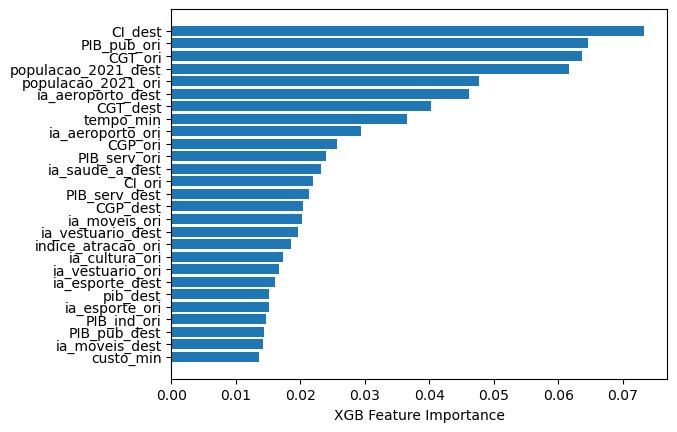

In [39]:
#XGBoost feature importance
from matplotlib import pyplot as plt
sorted_idx = fitted_model.feature_importances_.argsort()
plt.barh(df_features.columns[sorted_idx][20:], fitted_model.feature_importances_[sorted_idx][20:])
plt.xlabel("XGB Feature Importance")

In [106]:
res = pd.DataFrame()
res["real_log"] = y_test
res["pred_log"] = pred_test
res["real"] = pow(10,res["real_log"])
res["pred"] = pow(10,res["pred_log"])


In [108]:
res.head(50)

,real_log,pred_log,real,pred
0,0.000000,1.375313,1.0,23.730850
1,1.000000,0.491871,10.0,3.103635
2,1.886491,1.971591,77.0,93.667923
3,2.897627,2.937648,790.0,866.259583
4,1.707570,1.467922,51.0,29.371252
5,3.094122,2.437650,1242.0,273.936676
6,2.064458,2.026435,116.0,106.275925
7,1.897627,1.379781,79.0,23.976250
8,2.544068,2.268243,350.0,185.456833
9,1.707570,0.744087,51.0,5.547369


<AxesSubplot: xlabel='real_log', ylabel='pred_log'>

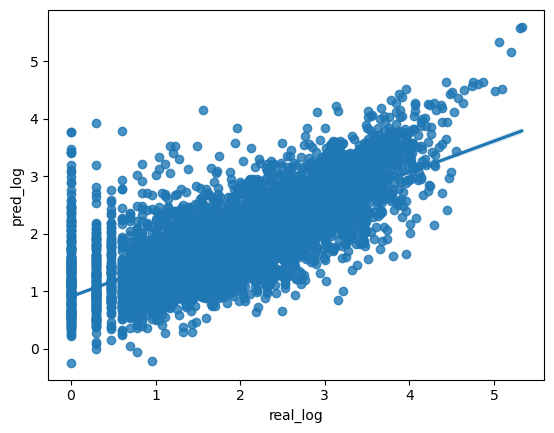

In [111]:
import seaborn as sns
sns.regplot(res["real_log"],res["pred_log"])

### XGBoost só com variáveis do Gravity Model

In [49]:
xgb1 = xgb.XGBRegressor(seed = 123)
 
# Fitting the model
xgb1.fit(X_train, y_train)
pred_train = xgb1.predict(X_train)
 
# Predict the model
pred = xgb1.predict(X_test)

#Caculating score
print(r2_score(y_train, pred_train))
print(r2_score(y_test, pred))

0.7158399884404025
0.5034826469016362


In [51]:
#Step 1 - Estimators e Learning Rate
model = xgb.XGBRegressor(max_depth = 5, 
                        min_child_weight = 1, 
                        gamma = 0, 
                        subsample=0.8,
                        colsample_bytree=0.8, 
                        scale_pos_weight = 1, 
                        seed=42)
param_grid = {
    'n_estimators': range(50, 1001, 50),
    'learning_rate': [.01, 0.05, .1, .2, .3, .4, .5]
}

model, pred, gs1 = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=5)

# Root Mean Squared Error
print(model.best_score_)
print(model.best_params_)
print("score_test: ",r2_score(y_test, pred))

Fitting 5 folds for each of 140 candidates, totalling 700 fits
[CV 1/5] END learning_rate=0.01, n_estimators=50;, score=-1.627 total time=   0.5s
[CV 2/5] END learning_rate=0.01, n_estimators=50;, score=-1.633 total time=   0.5s
[CV 4/5] END learning_rate=0.01, n_estimators=50;, score=-1.635 total time=   0.5s
[CV 3/5] END learning_rate=0.01, n_estimators=50;, score=-1.673 total time=   0.5s
[CV 5/5] END learning_rate=0.01, n_estimators=50;, score=-1.661 total time=   0.6s
[CV 1/5] END learning_rate=0.01, n_estimators=100;, score=-1.043 total time=   1.1s
[CV 3/5] END learning_rate=0.01, n_estimators=100;, score=-1.073 total time=   1.1s
[CV 2/5] END learning_rate=0.01, n_estimators=100;, score=-1.032 total time=   1.1s
[CV 4/5] END learning_rate=0.01, n_estimators=100;, score=-1.046 total time=   1.0s
[CV 5/5] END learning_rate=0.01, n_estimators=100;, score=-1.061 total time=   1.0s
[CV 2/5] END learning_rate=0.01, n_estimators=150;, score=-0.780 total time=   1.5s
[CV 1/5] END learn

In [52]:
resultsRF = pd.DataFrame(gs1.cv_results_)
resultsRFSorted = resultsRF.sort_values(by='rank_test_score')
resultsRFSorted.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
59,9.706292,0.136331,0.115197,0.005913,0.1,1000,"{'learning_rate': 0.1, 'n_estimators': 1000}",-0.509895,-0.474844,-0.497037,-0.503315,-0.495124,-0.496043,0.011798,1
58,9.361602,0.104929,0.108434,0.002214,0.1,950,"{'learning_rate': 0.1, 'n_estimators': 950}",-0.511655,-0.476323,-0.497284,-0.504786,-0.496157,-0.497241,0.011861,2
57,8.828267,0.153719,0.105720,0.004516,0.1,900,"{'learning_rate': 0.1, 'n_estimators': 900}",-0.511951,-0.477131,-0.498002,-0.505468,-0.496610,-0.497833,0.011728,3
56,8.256707,0.107592,0.099076,0.003383,0.1,850,"{'learning_rate': 0.1, 'n_estimators': 850}",-0.512590,-0.478762,-0.498321,-0.505814,-0.496626,-0.498423,0.011359,4
55,7.752655,0.113944,0.092861,0.001256,0.1,800,"{'learning_rate': 0.1, 'n_estimators': 800}",-0.514252,-0.479388,-0.499527,-0.506768,-0.497987,-0.499584,0.011638,5


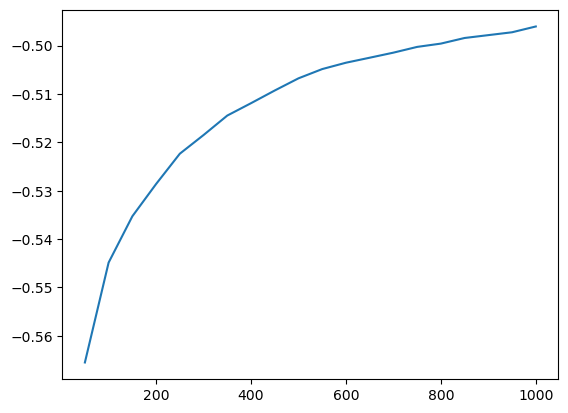

In [54]:
resultsRF11 = resultsRF[resultsRF.param_learning_rate == 0.1]
# resultsRF5 = resultsRF[resultsRF.param_max_depth == 0.05]
# resultsRF7 = resultsRF[resultsRF.param_max_depth == 7]

plt.plot(resultsRF11['param_n_estimators'],resultsRF11['mean_test_score'], linestyle='solid')
# plt.plot(resultsRF5['param_min_samples_split'],resultsRF5['mean_test_score'], linestyle='solid')
# plt.plot(resultsRF['param_max_depth'],resultsRF['mean_test_score'], linestyle='solid')

In [55]:
#Step 2 - 
model = xgb.XGBRegressor(n_estimators = 1000,
                        learning_rate = 0.1,
                        gamma = 0, 
                        subsample=0.8,
                        colsample_bytree=0.8, 
                        scale_pos_weight = 1, 
                        seed=42)
param_grid = {
    'max_depth': range(3, 10, 2),
    'min_child_weight': range(1, 6, 2)
    # 'max_depth': [3,4,5],
    # 'min_child_weight': [1,2]
}

model, pred, gs1 = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=5)

# Root Mean Squared Error
print(model.best_score_)
print(model.best_params_)
print("score_test: ",r2_score(y_test, pred))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 4/5] END ..max_depth=3, min_child_weight=1;, score=-0.519 total time=  13.6s
[CV 3/5] END ..max_depth=3, min_child_weight=1;, score=-0.516 total time=  13.7s
[CV 1/5] END ..max_depth=3, min_child_weight=1;, score=-0.527 total time=  13.7s
[CV 2/5] END ..max_depth=3, min_child_weight=1;, score=-0.495 total time=  13.7s
[CV 5/5] END ..max_depth=3, min_child_weight=1;, score=-0.512 total time=   8.1s
[CV 1/5] END ..max_depth=3, min_child_weight=3;, score=-0.531 total time=   8.0s
[CV 3/5] END ..max_depth=3, min_child_weight=3;, score=-0.514 total time=   8.0s
[CV 2/5] END ..max_depth=3, min_child_weight=3;, score=-0.494 total time=   8.0s
[CV 2/5] END ..max_depth=3, min_child_weight=5;, score=-0.495 total time=   6.9s
[CV 1/5] END ..max_depth=3, min_child_weight=5;, score=-0.530 total time=   6.9s
[CV 4/5] END ..max_depth=3, min_child_weight=3;, score=-0.521 total time=   7.0s
[CV 5/5] END ..max_depth=3, min_child_weight=3;,

In [57]:
resultsRF = pd.DataFrame(gs1.cv_results_)
resultsRFSorted = resultsRF.sort_values(by='rank_test_score')
resultsRFSorted.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_child_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,11.786569,0.380544,0.268524,0.123752,5,1,"{'max_depth': 5, 'min_child_weight': 1}",-0.509895,-0.474844,-0.497037,-0.503315,-0.495124,-0.496043,0.011798,1
4,10.381341,0.447127,0.121898,0.004116,5,3,"{'max_depth': 5, 'min_child_weight': 3}",-0.520516,-0.481900,-0.500686,-0.500231,-0.499417,-0.500550,0.012230,2
5,9.699241,0.123827,0.117284,0.005111,5,5,"{'max_depth': 5, 'min_child_weight': 5}",-0.517585,-0.485133,-0.504263,-0.502818,-0.501468,-0.502253,0.010326,3
6,13.494426,0.208789,0.195513,0.003757,7,1,"{'max_depth': 7, 'min_child_weight': 1}",-0.517537,-0.484595,-0.507761,-0.509901,-0.507703,-0.505499,0.011057,4
0,12.491123,2.262057,0.078750,0.006309,3,1,"{'max_depth': 3, 'min_child_weight': 1}",-0.526674,-0.494869,-0.516291,-0.518661,-0.512157,-0.513730,0.010551,5


In [ ]:
resultsRF5 = resultsRF[resultsRF.param_max_depth == 3]
resultsRF7 = resultsRF[resultsRF.param_max_depth == 4]
# resultsRF7 = resultsRF[resultsRF.param_max_depth == 7]

plt.plot(resultsRF5['param_min_child_weight'],resultsRF5['mean_test_score'], linestyle='solid')
plt.plot(resultsRF7['param_min_child_weight'],resultsRF7['mean_test_score'], linestyle='solid'

In [58]:
#Step 3 - Gamma
model = xgb.XGBRegressor(n_estimators = 1000,
                        learning_rate = 0.1,
                        max_depth = 5,
                        min_child_weight = 1, 
                        subsample=0.8,
                        colsample_bytree=0.8, 
                        scale_pos_weight = 1,
                        seed=42)
param_grid = {
    'gamma':[i/10.0 for i in range(0,5)]
}

model, pred, gs1 = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=5)

# Root Mean Squared Error
print(model.best_score_)
print(model.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 3/5] END ........................gamma=0.0;, score=-0.497 total time=  10.6s
[CV 2/5] END ........................gamma=0.0;, score=-0.475 total time=  10.8s
[CV 4/5] END ........................gamma=0.0;, score=-0.503 total time=  10.8s
[CV 1/5] END ........................gamma=0.0;, score=-0.510 total time=  10.9s
[CV 5/5] END ........................gamma=0.0;, score=-0.495 total time=  11.3s
[CV 1/5] END ........................gamma=0.1;, score=-0.505 total time=  11.2s
[CV 3/5] END ........................gamma=0.1;, score=-0.494 total time=  11.2s
[CV 2/5] END ........................gamma=0.1;, score=-0.472 total time=  11.2s
[CV 1/5] END ........................gamma=0.2;, score=-0.516 total time=   9.7s
[CV 4/5] END ........................gamma=0.1;, score=-0.500 total time=   9.8s
[CV 2/5] END ........................gamma=0.2;, score=-0.474 total time=   9.7s
[CV 5/5] END ........................gamma=0.1;, 

In [59]:
resultsRF = pd.DataFrame(gs1.cv_results_)
resultsRFSorted = resultsRF.sort_values(by='rank_test_score')
resultsRFSorted.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,10.530087,0.668234,0.124292,0.006578,0.1,{'gamma': 0.1},-0.505053,-0.471899,-0.494028,-0.500355,-0.492710,-0.492809,0.011363,1
3,10.463747,0.204966,0.183731,0.043628,0.3,{'gamma': 0.3},-0.509707,-0.477732,-0.497192,-0.498974,-0.491989,-0.495119,0.010432,2
2,9.965161,0.326091,0.139762,0.020572,0.2,{'gamma': 0.2},-0.516004,-0.474396,-0.498018,-0.497178,-0.492536,-0.495626,0.013294,3
0,10.731622,0.212328,0.131781,0.003883,0.0,{'gamma': 0.0},-0.509895,-0.474844,-0.497037,-0.503315,-0.495124,-0.496043,0.011798,4
4,10.500442,2.587234,0.115739,0.029237,0.4,{'gamma': 0.4},-0.513089,-0.479332,-0.500377,-0.500387,-0.493646,-0.497366,0.010995,5


In [60]:
#Step 4 - 
model = xgb.XGBRegressor(n_estimators = 1000,
                        learning_rate = 0.1,
                        max_depth = 5,
                        min_child_weight = 1,
                        gamma = 0.1, 
                        scale_pos_weight = 1,
                        seed=42)
param_grid = {
    'subsample':[i/10.0 for i in range(6,11)],
    'colsample_bytree':[i/10.0 for i in range(6,11)]
    # 'subsample':[i/100.0 for i in range(85,100,5)],
    # 'colsample_bytree':[i/100.0 for i in range(65,80,5)]
}

model, pred, gs1 = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=5)

# Root Mean Squared Error
print(model.best_score_)
print(model.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 2/5] END colsample_bytree=0.6, subsample=0.6;, score=-0.483 total time=  13.8s
[CV 3/5] END colsample_bytree=0.6, subsample=0.6;, score=-0.496 total time=  14.1s
[CV 1/5] END colsample_bytree=0.6, subsample=0.6;, score=-0.532 total time=  14.3s
[CV 4/5] END colsample_bytree=0.6, subsample=0.6;, score=-0.503 total time=  14.3s
[CV 1/5] END colsample_bytree=0.6, subsample=0.7;, score=-0.532 total time=  18.7s
[CV 5/5] END colsample_bytree=0.6, subsample=0.6;, score=-0.509 total time=  19.0s
[CV 3/5] END colsample_bytree=0.6, subsample=0.7;, score=-0.492 total time=  18.6s
[CV 2/5] END colsample_bytree=0.6, subsample=0.7;, score=-0.477 total time=  18.7s
[CV 5/5] END colsample_bytree=0.6, subsample=0.7;, score=-0.507 total time=   9.7s
[CV 2/5] END colsample_bytree=0.6, subsample=0.8;, score=-0.478 total time=   9.6s
[CV 1/5] END colsample_bytree=0.6, subsample=0.8;, score=-0.528 total time=   9.6s
[CV 4/5] END colsample_byt

In [62]:
resultsRF = pd.DataFrame(gs1.cv_results_)
resultsRFSorted = resultsRF.sort_values(by='rank_test_score')
resultsRFSorted.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,18.787661,4.543242,0.286398,0.098073,0.7,0.8,"{'colsample_bytree': 0.7, 'subsample': 0.8}",-0.505053,-0.471899,-0.494028,-0.500355,-0.49271,-0.492809,0.011363,1
10,10.437044,0.880034,0.133114,0.015145,0.8,0.8,"{'colsample_bytree': 0.8, 'subsample': 0.8}",-0.505053,-0.471899,-0.494028,-0.500355,-0.49271,-0.492809,0.011363,1
14,9.742744,0.085238,0.154997,0.029233,0.9,0.8,"{'colsample_bytree': 0.9, 'subsample': 0.8}",-0.505053,-0.471899,-0.494028,-0.500355,-0.49271,-0.492809,0.011363,1
7,25.376314,1.393224,0.310385,0.050816,0.7,0.9,"{'colsample_bytree': 0.7, 'subsample': 0.9}",-0.510241,-0.474633,-0.495383,-0.495782,-0.48903,-0.493014,0.011522,4
11,9.552411,0.109258,0.140017,0.021264,0.8,0.9,"{'colsample_bytree': 0.8, 'subsample': 0.9}",-0.510241,-0.474633,-0.495383,-0.495782,-0.48903,-0.493014,0.011522,4


In [63]:
#Step 5 - 
model = xgb.XGBRegressor(n_estimators = 1000,
                        learning_rate = 0.1,
                        max_depth = 5,
                        min_child_weight = 1,
                        gamma = 0.1,
                        subsample = .8,
                        colsample_bytree = .7,
                        scale_pos_weight = 1,
                        seed=42)
param_grid = {
    'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}

model, pred, gs1 = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=5)

# Root Mean Squared Error
print(model.best_score_)
print(model.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 2/5] END ......................reg_alpha=0;, score=-0.472 total time=  12.5s
[CV 3/5] END ......................reg_alpha=0;, score=-0.494 total time=  12.5s
[CV 1/5] END ......................reg_alpha=0;, score=-0.505 total time=  12.5s
[CV 4/5] END ......................reg_alpha=0;, score=-0.500 total time=  12.6s
[CV 5/5] END ......................reg_alpha=0;, score=-0.493 total time=  10.0s
[CV 1/5] END ..................reg_alpha=0.001;, score=-0.509 total time=  10.0s
[CV 2/5] END ..................reg_alpha=0.001;, score=-0.477 total time=  10.0s
[CV 3/5] END ..................reg_alpha=0.001;, score=-0.496 total time=  10.0s
[CV 4/5] END ..................reg_alpha=0.001;, score=-0.498 total time=   9.7s
[CV 1/5] END ..................reg_alpha=0.005;, score=-0.508 total time=   9.7s
[CV 5/5] END ..................reg_alpha=0.001;, score=-0.493 total time=   9.8s
[CV 2/5] END ..................reg_alpha=0.005;, 

In [ ]:
resultsRF = pd.DataFrame(gs1.cv_results_)
resultsRFSorted = resultsRF.sort_values(by='rank_test_score')
resultsRFSorted.head()

In [65]:
model = xgb.XGBRegressor(n_estimators = 1000,
                        learning_rate = 0.1,
                        max_depth = 5,
                        min_child_weight = 1,
                        gamma = 0.1,
                        subsample = .8,
                        colsample_bytree = .7,
                        reg_alpha = 0,
                        seed=42)
fitted_model = model.fit(X_train, y_train)

pred_train = fitted_model.predict(X_train)
pred_test = fitted_model.predict(X_test)

print(r2_score(y_train, pred_train))
print(r2_score(y_test, pred_test))

0.7960158898492506
0.5365360702890312


Text(0.5, 0, 'XGB Feature Importance')

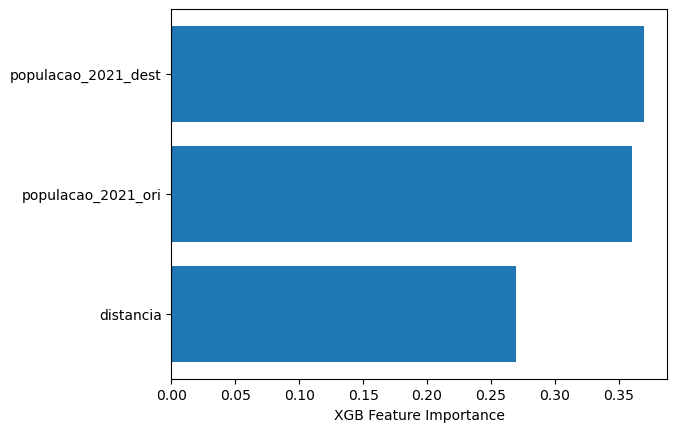

In [66]:
#XGBoost feature importance
from matplotlib import pyplot as plt
sorted_idx = fitted_model.feature_importances_.argsort()
plt.barh(df_features_2.columns[sorted_idx], fitted_model.feature_importances_[sorted_idx])
plt.xlabel("XGB Feature Importance")

## CV = 10 k-fold 

In [27]:
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
import xgboost as xgb


In [28]:
XGBoost47 = xgb.XGBRegressor(n_estimators = 1000,
                        learning_rate = 0.1,
                        max_depth = 5,
                        min_child_weight = 1,
                        gamma = 0,
                        subsample = .9,
                        colsample_bytree = .9,
                        reg_alpha = 0.01,
                        seed=42)

XGBoost3 = xgb.XGBRegressor(n_estimators = 1000,
                        learning_rate = 0.1,
                        max_depth = 5,
                        min_child_weight = 1,
                        gamma = 0.1,
                        subsample = .8,
                        colsample_bytree = .7,
                        reg_alpha = 0,
                        seed=42)

In [181]:
models = []
models.append(('xg-boost-47', XGBoost47, X_train, y_train))
models.append(('xg-boost-3', XGBoost3, X_train_2, y_train_2))

In [182]:
X_train.shape

(14533, 47)

In [183]:
#Avaliação de cada modelo 
print('\nDesempenhos médios dos modelos:')


results = []
names = []
for name, model, X_train_, y_train_ in models:
    
    cv_results = model_selection.cross_val_score(model, X_train_, y_train_, cv = model_selection.KFold(n_splits=10), scoring = 'neg_mean_squared_error')
    
    results.append(cv_results)
    names.append(name)
    
    print(f"{name}: {round(cv_results.mean(), 4)} ({round(cv_results.std(), 4)})")



Desempenhos médios dos modelos:
xg-boost-47: -0.4071 (0.0237)
xg-boost-3: -0.4743 (0.0301)


In [184]:
from scipy.stats import kruskal
#Comparando modelos com Kruskal
stat, p = kruskal(results[0], results[1])
print(f"p_value: {p}. Comparison stats: {stat}")

p_value: 0.0003810584520506864. Comparison stats: 12.622857142857143


In [185]:
alpha = 0.05
if p > alpha:
    print('\nMesma distribuição (aceita H0)')
else:
    print('\nDiferentes distribuições (rejeita H0)')

alg = ["XGBoost-47        ", "XGBoost-3     "]
print("\nCOMPARAÇÃO:")
for i in range(len(results)):
    for j in range(i+1, len(results)):
        print(f'   {alg[i]} | {alg[j]} -> statistic = {round(kruskal(results[i],results[j]).statistic, 3)},\tp_value = {round(kruskal(results[i],results[j]).pvalue, 4)},\t{"Mesma distribuição (aceita H0)" if (kruskal(results[i],results[j]).pvalue > alpha) else "Diferentes distribuições (rejeita H0)"} ')



Diferentes distribuições (rejeita H0)

COMPARAÇÃO:
   XGBoost-47         | XGBoost-3      -> statistic = 12.623,	p_value = 0.0004,	Diferentes distribuições (rejeita H0) 


Avaliando o Modelo na Base de Teste

In [29]:
XGBoost47.fit(X_train, y_train)
XGBoost3.fit(X_train_2, y_train_2)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.1, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [30]:
y_test_prediction_xgboost47 = XGBoost47.predict(X_test)
y_test_prediction_xgboost3 = XGBoost3.predict(X_test_2)

In [195]:
print("\nR2 XGBoost47: Treinamento",  XGBoost47.score(X_train, y_train)," Teste" ,XGBoost47.score(X_test, y_test))
print("\nMSE XGBoost3: Treinamento",  mean_squared_error(XGBoost47.predict(X_train), y_train)," Teste" , mean_squared_error(XGBoost47.predict(X_test), y_test))


R2 XGBoost47: Treinamento 0.9262030737070112  Teste 0.6172974269508089

MSE XGBoost3: Treinamento 0.0790497411632572  Teste 0.4091800090268672


In [196]:
print("\nR2 XGBoost3: Treinamento",  XGBoost3.score(X_train_2, y_train_2)," Teste" ,XGBoost3.score(X_test_2, y_test_2))
print("\nMSE XGBoost3: Treinamento",  mean_squared_error(XGBoost3.predict(X_train_2), y_train_2)," Teste" , mean_squared_error(XGBoost3.predict(X_test_2), y_test_2))


R2 XGBoost3: Treinamento 0.7986927836792517  Teste 0.5584264627713922

MSE XGBoost3: Treinamento 0.21563612664939466  Teste 0.4721239852390623


Feature importance de ambos regressores

In [ ]:
from matplotlib import pyplot as plt
sorted_idx = XGBoost47.feature_importances_.argsort()
plt.barh(df_features_2.columns[sorted_idx], fitted_model.feature_importances_[sorted_idx])
plt.xlabel("XGB Feature Importance")

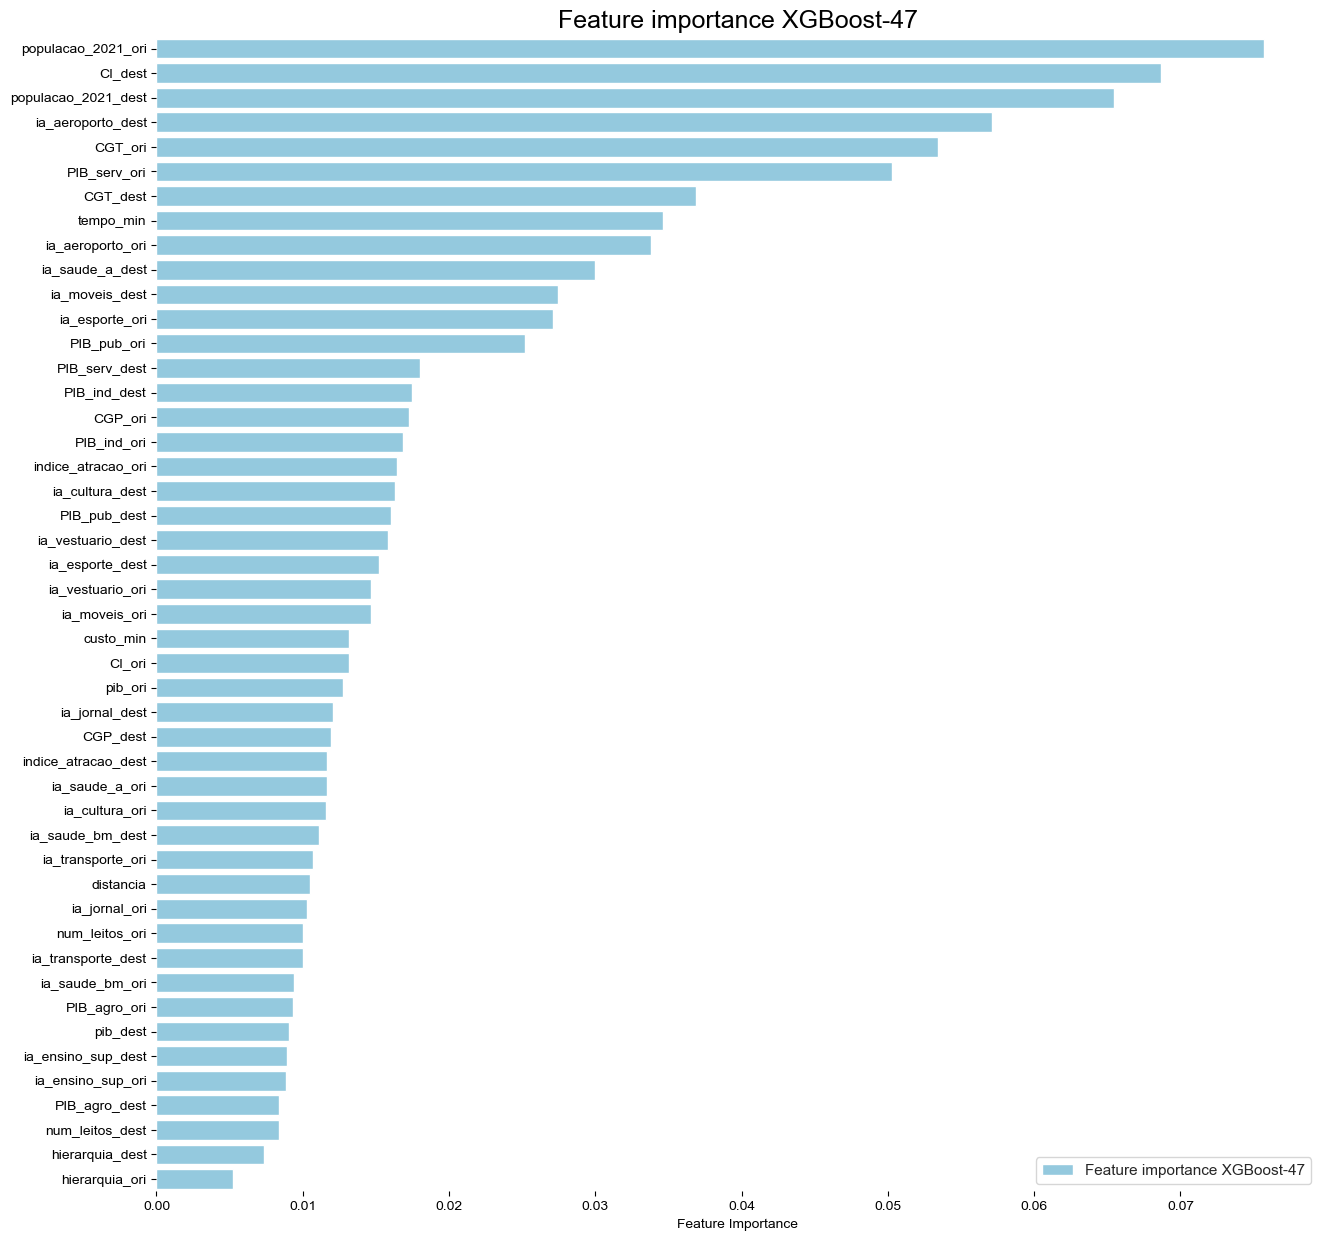

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

sns.set_theme(style="whitegrid")

sorted_idx = XGBoost47.feature_importances_.argsort()[::-1]
sns.barplot(x=XGBoost47.feature_importances_[sorted_idx], y=df_features.columns[sorted_idx], 
            label="Feature importance XGBoost-47", color='skyblue')
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="",
       xlabel="Feature Importance")
ax.set_title( "Feature importance XGBoost-47",fontsize=18)
sns.despine(left=True, bottom=True)


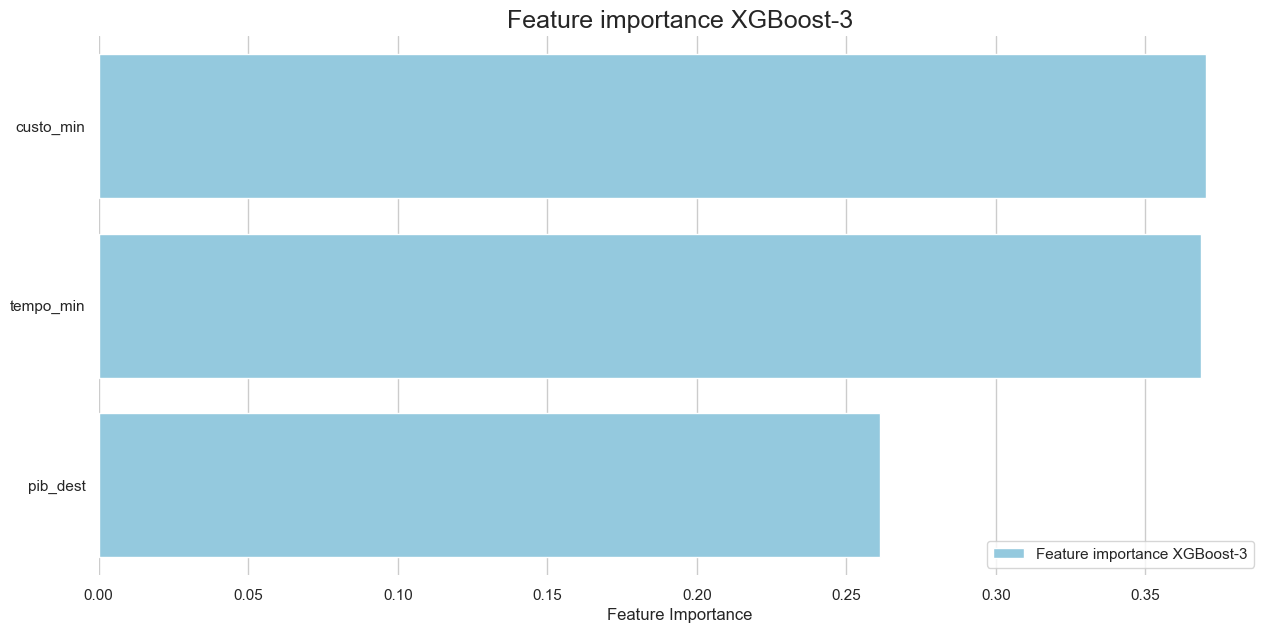

In [217]:
f, ax = plt.subplots(figsize=(15, 7))
sorted_idx = XGBoost3.feature_importances_.argsort()[::-1]
sns.barplot(x=XGBoost3.feature_importances_[sorted_idx], y=df_features.columns[sorted_idx], 
            label="Feature importance XGBoost-3", color='skyblue')
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="",
       xlabel="Feature Importance")
ax.set_title( "Feature importance XGBoost-3",fontsize=18)
sns.despine(left=True, bottom=True)

/opt/miniconda3/envs/alerta_epidemia/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'log(Predicted number of passengers)')

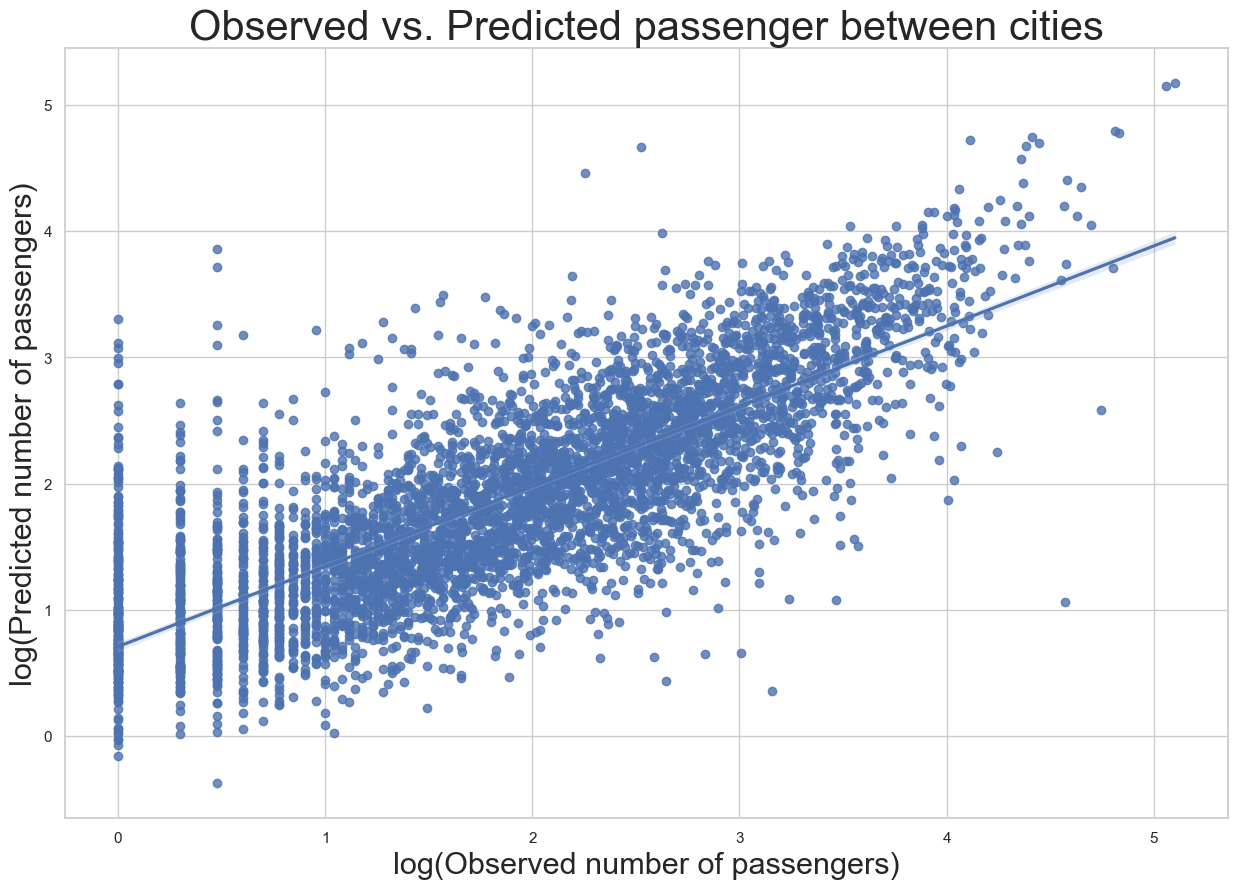

In [39]:
import seaborn as sns
# y_test_prediction_xgboost47
f, ax = plt.subplots(figsize=(15, 10))
sns.regplot(y_test,y_test_prediction_xgboost47)
ax.axes.set_title("Observed vs. Predicted passenger between cities",fontsize=30)
ax.set_xlabel("log(Observed number of passengers)",fontsize=22)
ax.set_ylabel("log(Predicted number of passengers)",fontsize=22)

In [34]:
residuo = y_test - y_test_prediction_xgboost47

Text(0, 0.5, 'Residual')

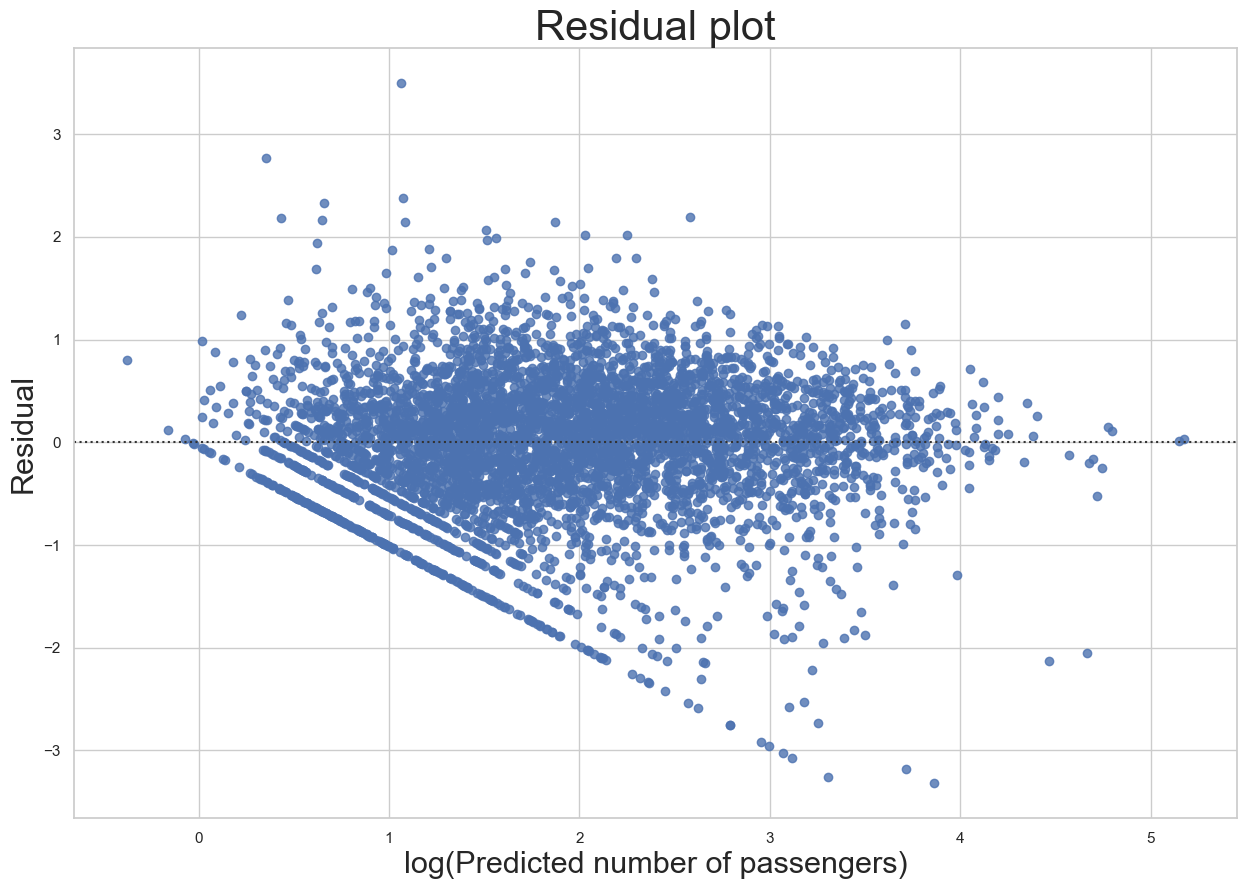

In [40]:
# sns.regplot(y_test_prediction_xgboost47, residuo)
f, ax = plt.subplots(figsize=(15, 10))

sns.residplot( x=y_test_prediction_xgboost47, y=residuo)
ax.axes.set_title("Residual plot",fontsize=30)
ax.set_xlabel("log(Predicted number of passengers)",fontsize=22)
ax.set_ylabel("Residual",fontsize=22)

# Gerando fluxo a partir de regressor

In [112]:
# Melhor modelo
from sklearn.ensemble import GradientBoostingRegressor
XGB = xgb.XGBRegressor(n_estimators = 1000,
                        learning_rate = 0.1,
                        max_depth = 5,
                        min_child_weight = 1,
                        gamma = 0,
                        subsample = .9,
                        colsample_bytree = .9,
                        reg_alpha = 0.01,
                        seed=42)
fitted_model = XGB.fit(X_sc, y_log)

In [117]:
#calulando distancia entre ligacoes
df_cidades_dest = pd.DataFrame(df_cidades.add_suffix('_dest'))
df_cidades_ori = pd.DataFrame(df_cidades.add_suffix('_ori'))

df_regic_merge =  df_regic_merge.merge(df_cidades_ori[["cod_cidade_ori", "latitude_ori", "longitude_ori", "uf_ori"]], 
                how='inner', 
                left_on=["cod_origem"], 
                right_on=["cod_cidade_ori"])

df_regic_merge =  df_regic_merge.merge(df_cidades_dest[["cod_cidade_dest", "latitude_dest", "longitude_dest", "uf_dest"]], 
                how='inner', 
                left_on=["cod_destino"], 
                right_on=["cod_cidade_dest"])

In [119]:
df_regic_merge["distancia"] = df_regic_merge.apply(lambda row: distance.distance((row["latitude_ori"], row["longitude_ori"]), (row["latitude_dest"], row["longitude_dest"])).km, axis=1)

In [120]:
#Separando features
features_columns = df_features.columns

#Dados a prever 
features_to_predict  = df_regic_merge[features_columns]

In [122]:
#Preenchendo dados faltantes
features_to_predict = features_to_predict.fillna(0)

#Label enconder
features_to_predict["hierarquia_ori"] = le.transform(features_to_predict["hierarquia_ori"])
features_to_predict["hierarquia_dest"] = le.transform(features_to_predict["hierarquia_dest"])

#Tranformando dataset to array
data = features_to_predict.to_numpy()

#Scaling
data_scaled = sc.transform(data)

In [123]:
#Realizando a predição
predicao = XGB.predict(data_scaled)

In [129]:
df_rod_final = pd.DataFrame(df_regic_merge[["cod_destino","cod_origem"]]) 
df_rod_final["passageiros_rodov_pred_log"] = predicao
df_rod_final[df_rod_final<0] = 0
df_rod_final["passageiros_rodov_pred"] = pow(10,df_rod_final["passageiros_rodov_pred_log"] )
df_rod_final['passageiros_rodov_pred'] = df_rod_final['passageiros_rodov_pred'].astype('int')

In [139]:
df_rod_final.to_csv('predicao_rodov.csv', index = False)